<a href="https://colab.research.google.com/github/Rushikesh3005/Airbnb_Booking_Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
#Mounting google colab to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
#Importing dataframe to colab notebook
df=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [ ]:
df.head()  #head of the data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.tail() #tail of the data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
df.info() #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe(include="all") #data description

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [ ]:
l= list(df['neighbourhood_group'].unique()) #list of the neighborhood groups 
l

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [ ]:
def neighbourhood_group_subset(n):
  return df[df['neighbourhood_group']==n]

In [ ]:
def room(room_types,neighbourhood_groups):    #user defined function to get room type and neighbourhood group
  a=neighbourhood_group_subset(neighbourhood_groups)
  return a[a['room_type']==room_types]


private_room_df=room('Private room','Brooklyn')
entire_home_df=room('Entire home/apt','Brooklyn')
shared_room_df=room('Shared room','Brooklyn')




In [ ]:
#user defined function for bar plots
def plots(aa,var):       
          w = 0.25
          #plt.figsize(figure=(20,10))
          plt.figure(figsize=(20,7))
          


          bar1=np.arange(aa['neighbourhood'].shape[0])
          bar2=[w+i for i in bar1]
          bar3=[w+i for i in bar2]
          plt.bar(bar1,aa[var+'1'],w,label='private_room')
          plt.bar(bar2,aa[var+'2'],w,label="entire_room")
          plt.bar(bar3,aa[var +'3'],w,label="sheared_room")

          plt.xlabel('neighbourhood',size=10)
          plt.ylabel(var,size=10)
          plt.title('variation of  ' + var+'   wrt neighbourhood',size=20)
          plt.xticks(bar1+w/2,aa['neighbourhood'],rotation=90,fontsize=15)
          plt.legend()
          #plt.xticks(rotation=90)
          plt.show()
          #ptl.xticks(bar1+w/2,df['month_number'])

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

1.Brokeyan

In [ ]:
#dataframe as per different room types
private_room_df=room('Private room','Brooklyn')
entire_home_df=room('Entire home/apt','Brooklyn')
shared_room_df=room('Shared room','Brooklyn')

In [ ]:
#dataframe with neighbourhood and its prices for diff room types
a=private_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price3'}, axis=1)




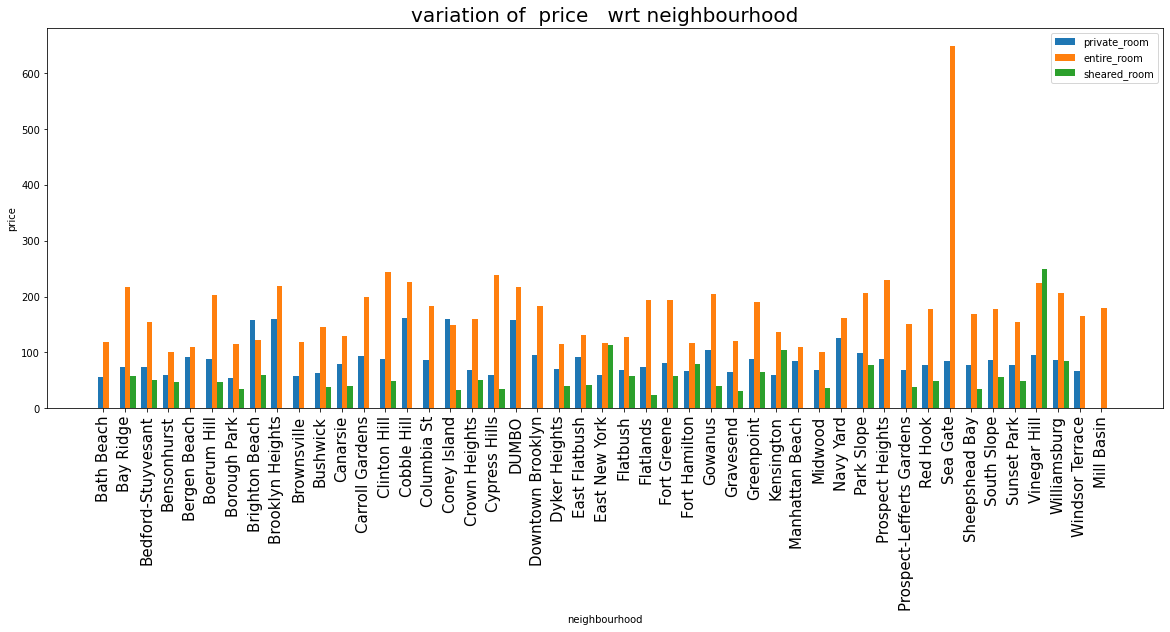

In [ ]:
#variation of price vs neighbourhood
final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='price')


In [ ]:
a=private_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews3'}, axis=1)

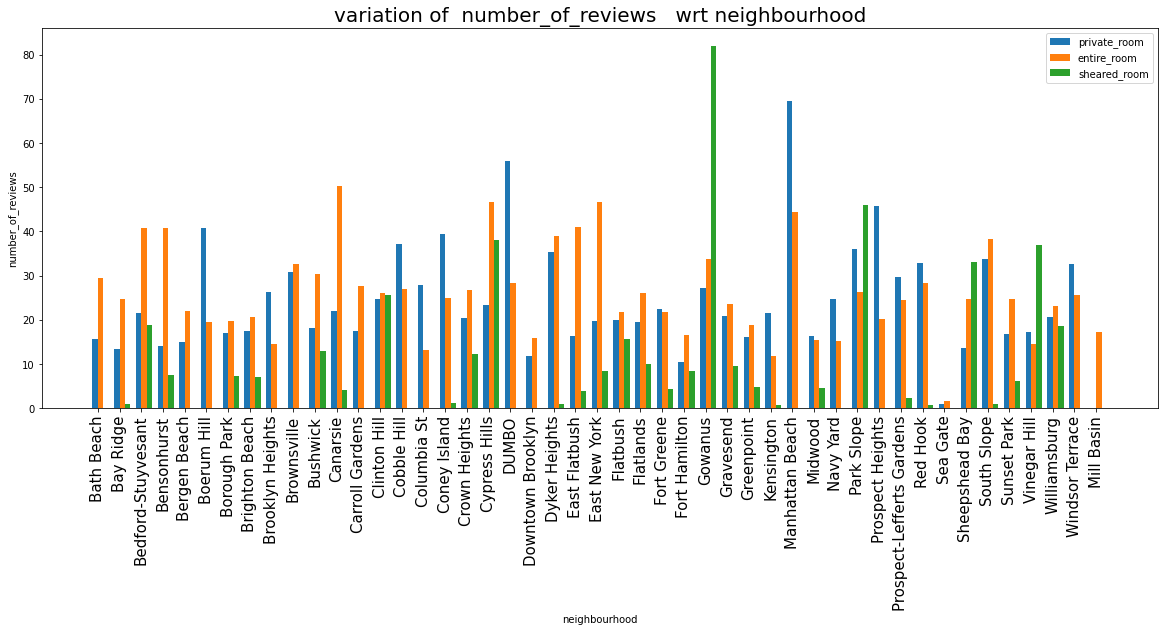

In [ ]:
#variation in number of reviews
final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='number_of_reviews')

###2.Manhattan

In [ ]:
#dataframe as per different room types
private_room_df=room('Private room','Manhattan')
entire_home_df=room('Entire home/apt','Manhattan')
shared_room_df=room('Shared room','Manhattan')

In [ ]:
#dataframe with neighbourhood and its prices for diff room types
a=private_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price3'}, axis=1)

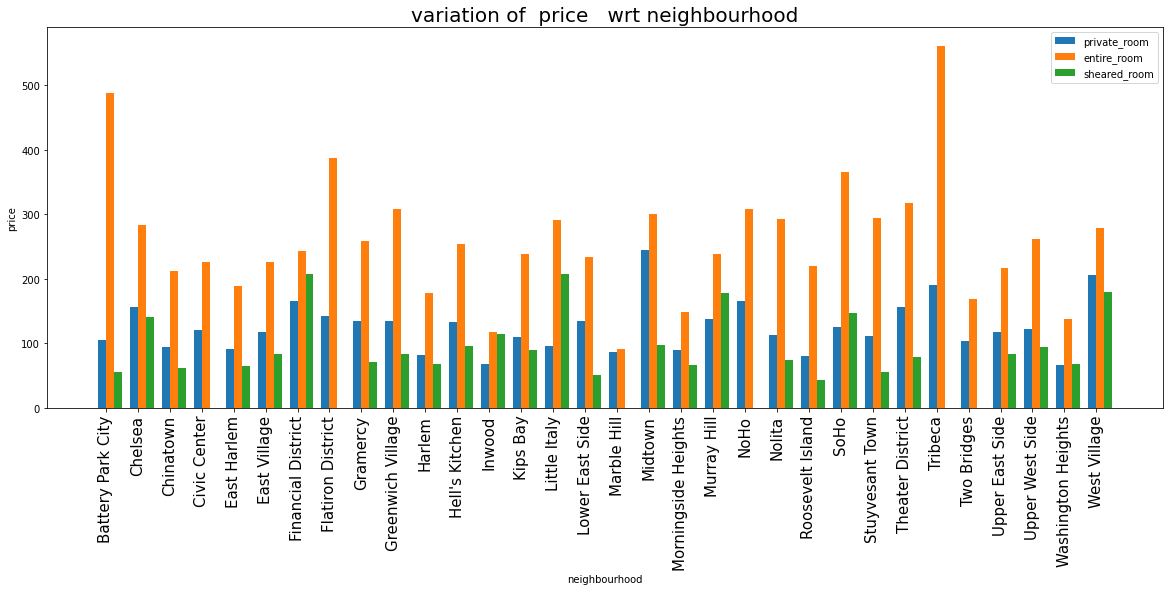

In [ ]:

final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='price')


In [ ]:
#dataframe with neighbourhood and its avg no. of reviews for diff room types
a=private_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews3'}, axis=1)

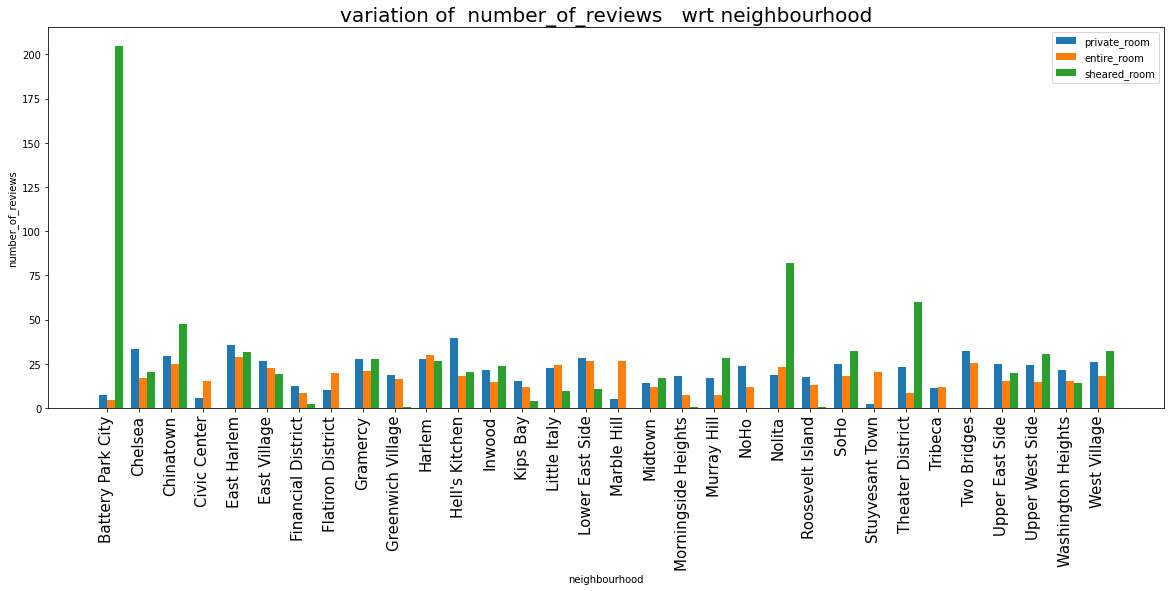

In [ ]:

final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='number_of_reviews')

###Queens

In [ ]:
private_room_df=room('Private room','Queens')
entire_home_df=room('Entire home/apt','Queens')
shared_room_df=room('Shared room','Queens')

In [ ]:
#dataframe with neighbourhood and its prices for diff room types
a=private_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price3'}, axis=1)

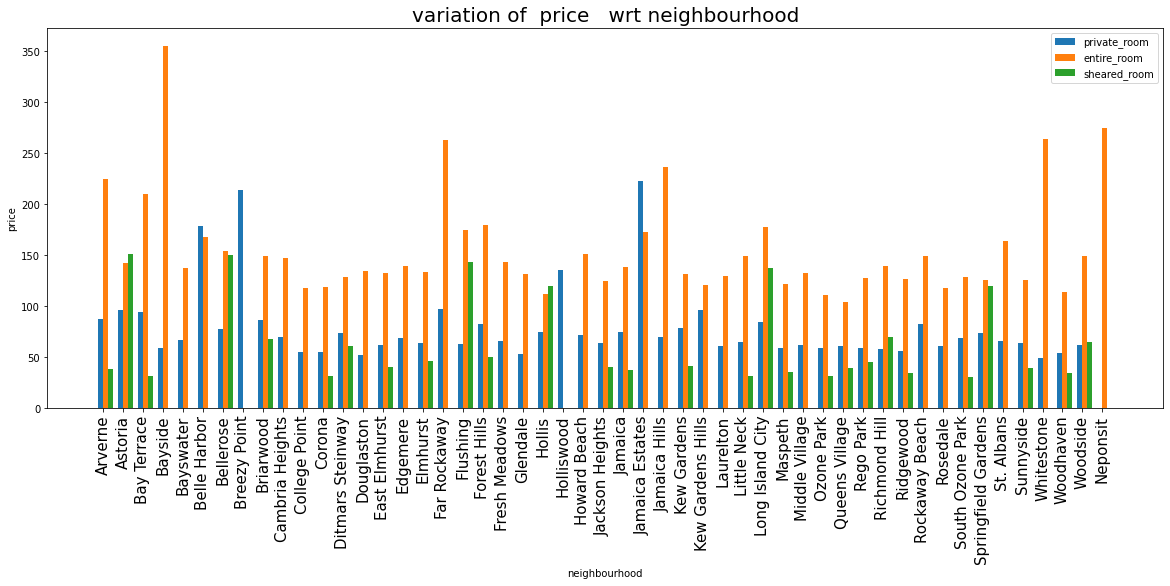

In [ ]:

final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='price')

In [ ]:
a=private_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews3'}, axis=1)

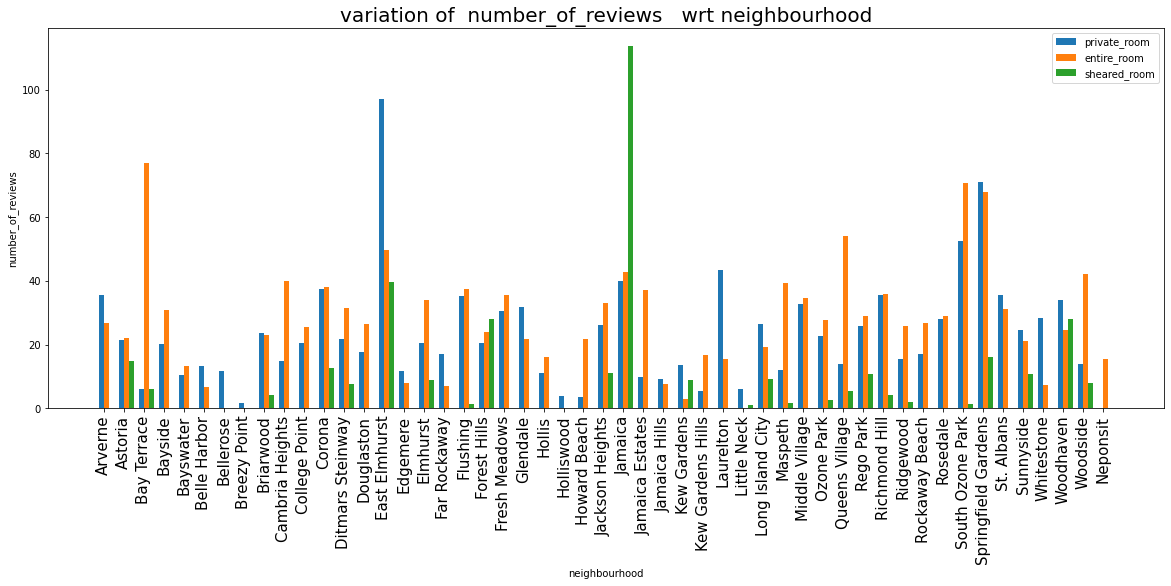

In [ ]:
final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='number_of_reviews')

###Staten Island

In [ ]:
private_room_df=room('Private room','Staten Island')
entire_home_df=room('Entire home/apt','Staten Island')
shared_room_df=room('Shared room','Staten Island')

In [ ]:
#dataframe with neighbourhood and its prices for diff room types
a=private_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price3'}, axis=1)

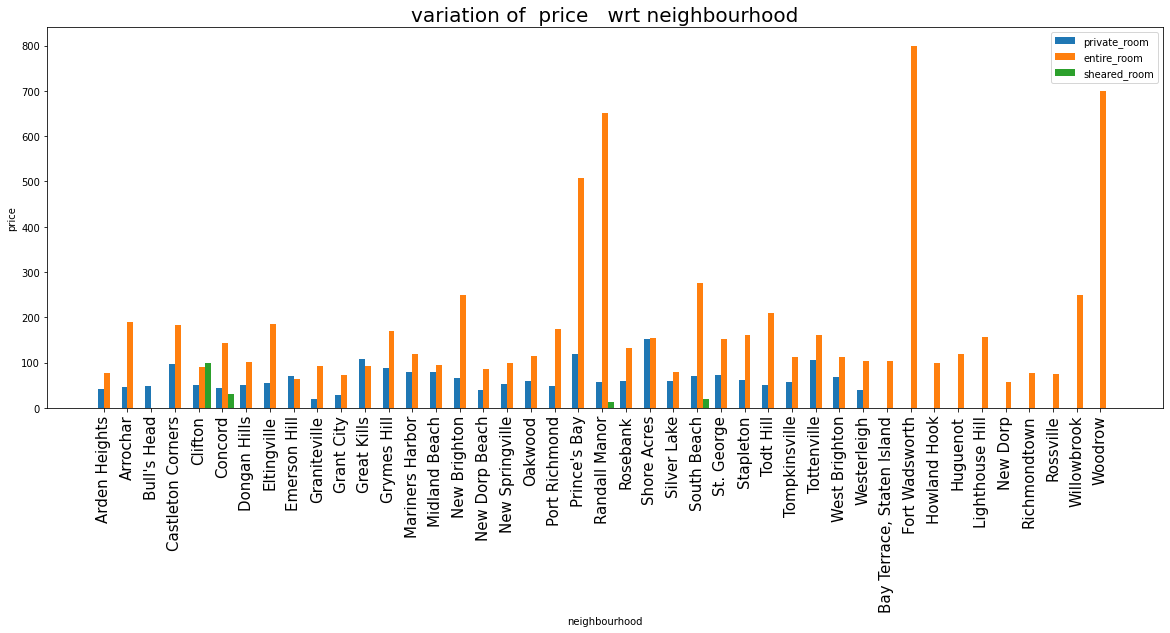

In [ ]:
final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='price')

In [ ]:
#dataframe with neighbourhood and its avg no. of reviews for diff room types
a=private_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews3'}, axis=1)

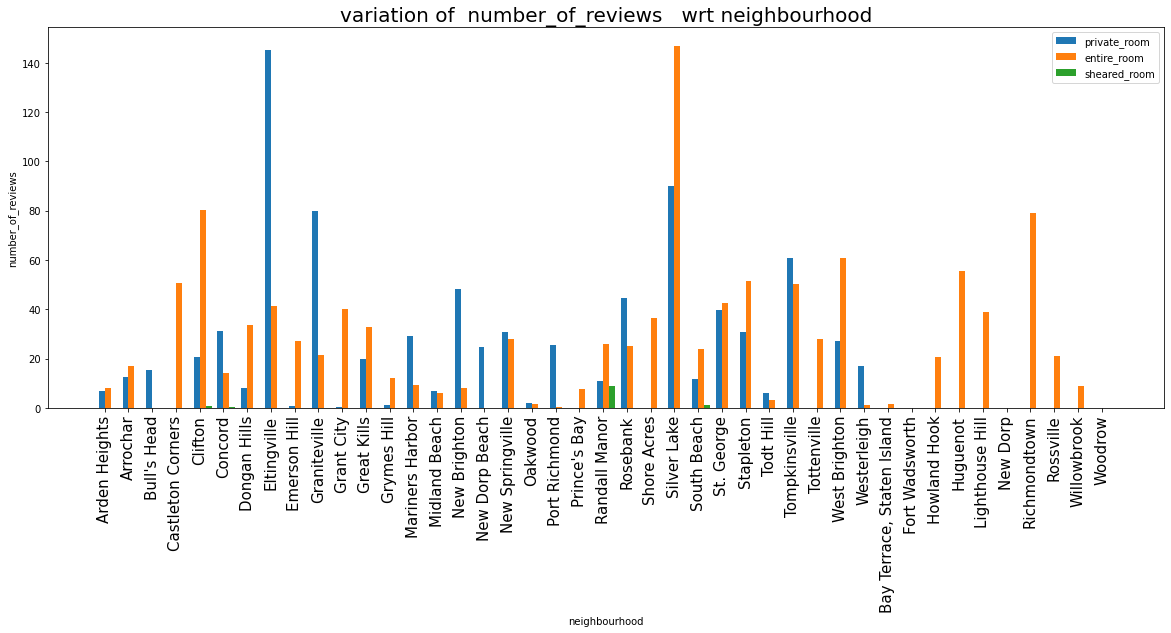

In [ ]:
final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='number_of_reviews')

###Bronx

In [ ]:

private_room_df=room('Private room','Bronx')
entire_home_df=room('Entire home/apt','Bronx')
shared_room_df=room('Shared room','Bronx')

In [ ]:
a=private_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['price'].mean().reset_index().rename({'price': 'price3'}, axis=1)

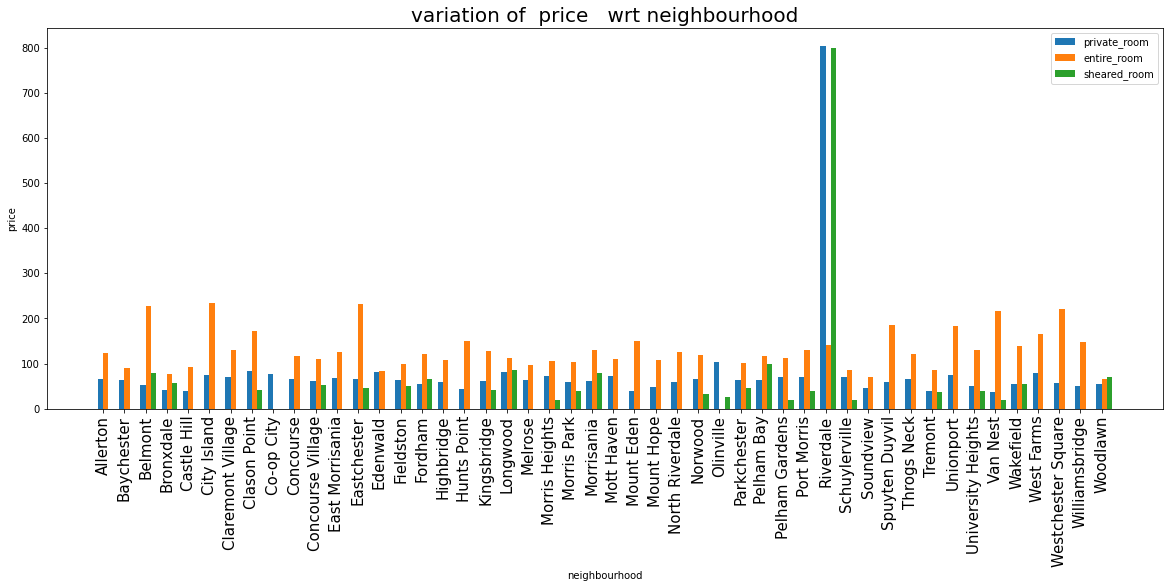

In [ ]:
final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='price')

In [ ]:
a=private_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews1'}, axis=1)
b=entire_home_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews2'}, axis=1)
c=shared_room_df.groupby('neighbourhood')['number_of_reviews'].mean().reset_index().rename({'number_of_reviews': 'number_of_reviews3'}, axis=1)

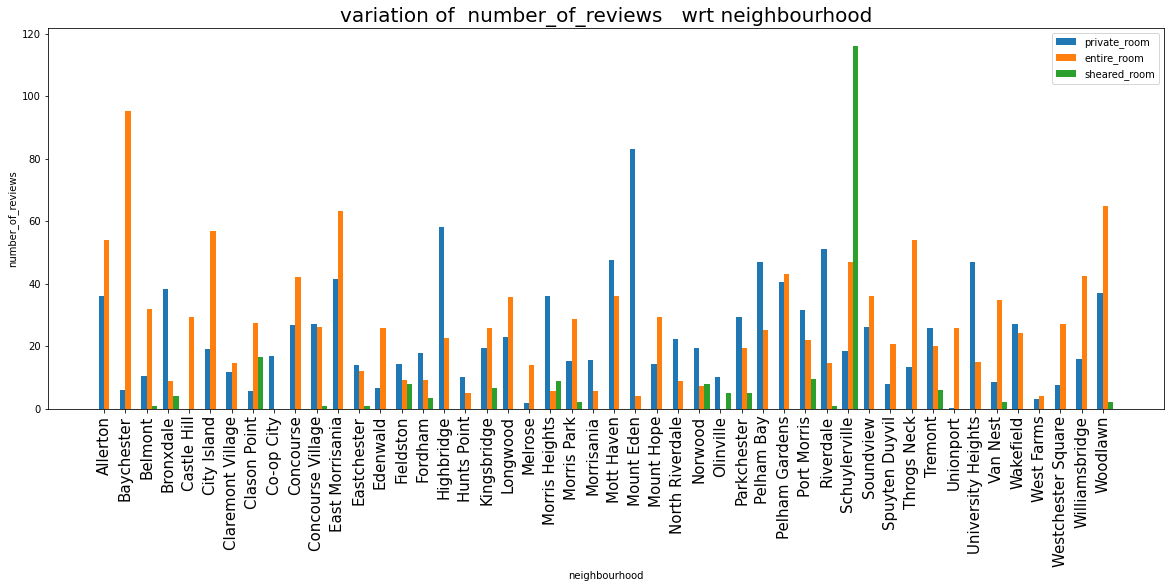

In [ ]:
final=pd.concat([a.set_index('neighbourhood'),b.set_index('neighbourhood'),c.set_index('neighbourhood')], axis=1, join='outer').reset_index().fillna(0).rename({'index':'neighbourhood'},axis=1)
#final=pd.merge(c,final,on='neighbourhood')
plots(final,var='number_of_reviews')

###Property count in different neighbourhood

In [ ]:
property_count=df['neighbourhood_group'].value_counts().reset_index()
property_count

,index,neighbourhood_group
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


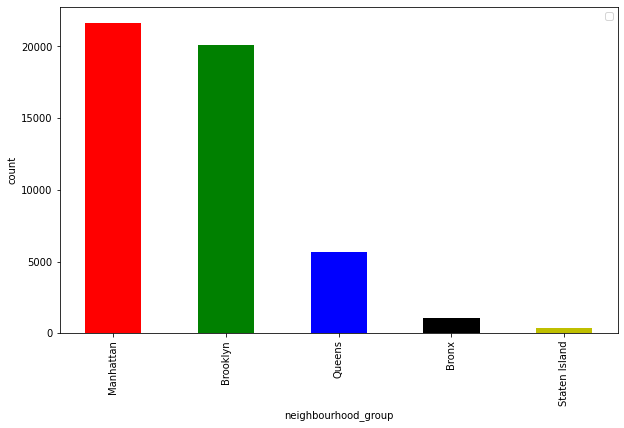

In [ ]:
w=0.5
 
#plt.figsize(figure=(20,10))
plt.figure(figsize=(10,6))

bar1=np.arange(5)
plt.bar(bar1,property_count['neighbourhood_group'],w,color='rgbkymc')
plt.xlabel('neighbourhood_group')
plt.ylabel('count')
plt.title('',size=20)
plt.xticks(bar1,property_count['index'],rotation=90)
plt.legend()

 
plt.show()

###number of room_type in each neighbourhood group

In [ ]:
a=df.groupby('neighbourhood_group')['room_type'].value_counts().unstack()
a

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


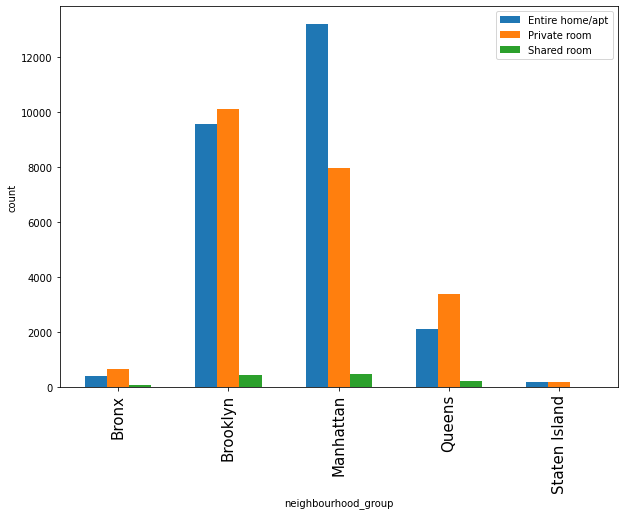

In [ ]:

plt.figure(figsize=(10,7))
w=0.2           


bar1=np.arange(5)
bar2=[w+i for i in bar1]
bar3=[w+i for i in bar2]
plt.bar(bar1,list(a['Entire home/apt']),w,label='Entire home/apt')
plt.bar(bar2,list(a['Private room']),w,label='Private room')
plt.bar(bar3,list(a['Shared room']),w,label='Shared room')
              
plt.xlabel('neighbourhood_group',size=10)
plt.ylabel('count',size=10)
plt.title('',size=20)
plt.xticks(bar1+2*w/2,a.index,rotation=90,fontsize=15)
plt.legend()
              #plt.xticks(rotation=90)
plt.show()
              #ptl.xticks(bar1+w/2,df['month_number'])                    

#Average price of each Neighbourhood group

In [ ]:
a=df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
a

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


##Average price per room type in each neighbourhood_group 

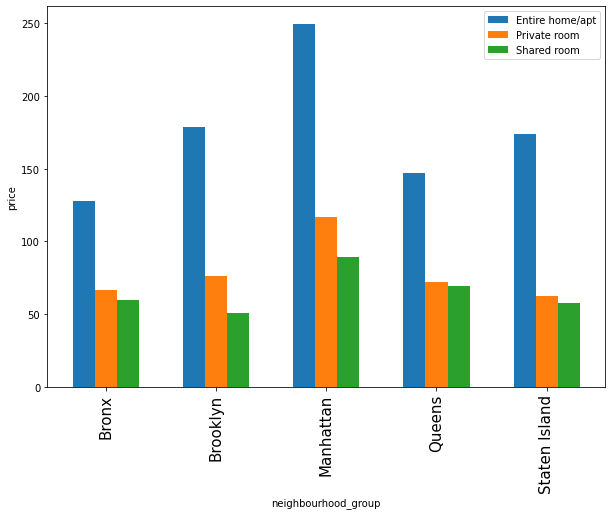

In [ ]:

plt.figure(figsize=(10,7))
w=0.2           


bar1=np.arange(5)
bar2=[w+i for i in bar1]
bar3=[w+i for i in bar2]
plt.bar(bar1,list(a['Entire home/apt']),w,label='Entire home/apt')
plt.bar(bar2,list(a['Private room']),w,label='Private room')
plt.bar(bar3,list(a['Shared room']),w,label='Shared room')
              
plt.xlabel('neighbourhood_group',size=10)
plt.ylabel('price',size=10)
plt.title('',size=20)
plt.xticks(bar1+2*w/2,a.index,rotation=90,fontsize=15)
plt.legend()
              
plt.show()
              

###Average NUmber of review in each neighboorhood

In [ ]:
review=df.groupby('neighbourhood_group')['number_of_reviews'].mean().reset_index()
review

,neighbourhood_group,number_of_reviews
0,Bronx,26.004583
1,Brooklyn,24.202845
2,Manhattan,20.985596
3,Queens,27.700318
4,Staten Island,30.941019


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys


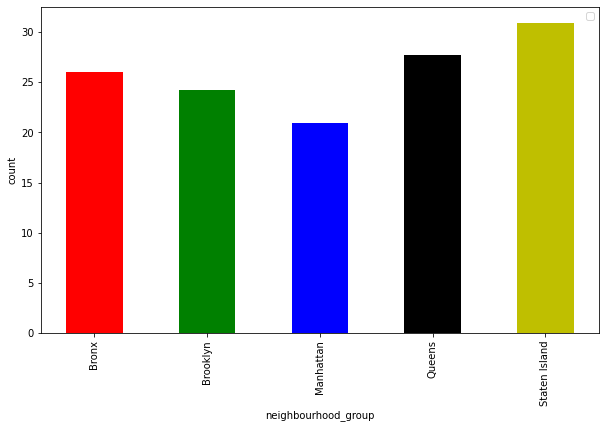

In [ ]:
w=0.5
 
#plt.figsize(figure=(20,10))
plt.figure(figsize=(10,6))

bar1=np.arange(5)
plt.bar(bar1,review['number_of_reviews'],w,color='rgbkymc')
plt.xlabel('neighbourhood_group')
plt.ylabel('count')
plt.title('',size=20)
plt.xticks(bar1,review['neighbourhood_group'],rotation=90)
plt.legend()

 
plt.show()

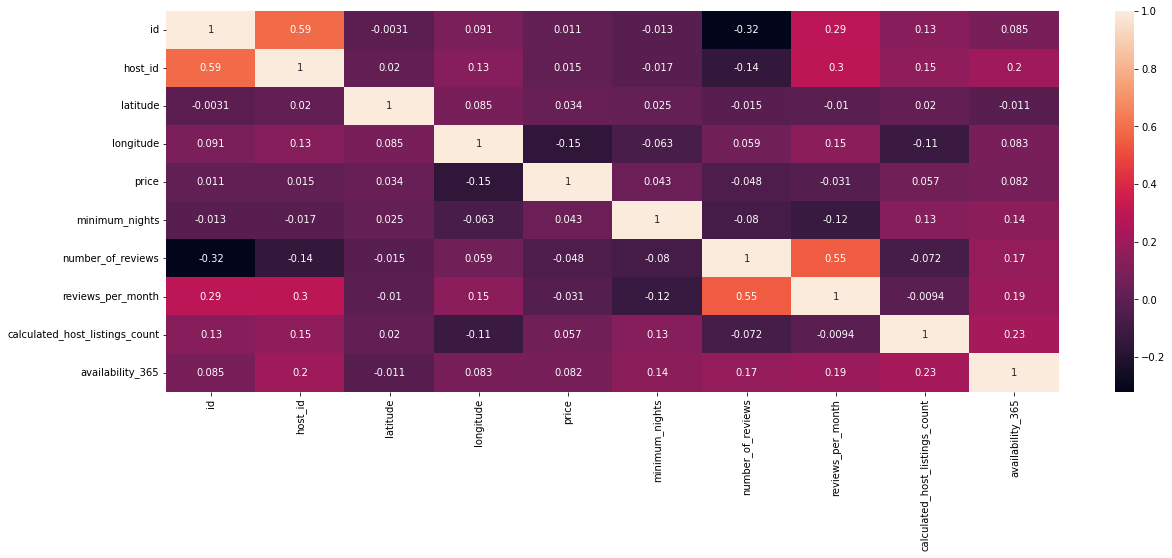

In [ ]:
plt.figure(figsize=(20,7)) #correlation
corr_=df.corr()
sns.heatmap(corr_,annot=True)

In [ ]:
bins=[0,40,80,150,200,250,300,400,500,600,1000,10000]

In [ ]:
a=df.groupby(['neighbourhood_group',pd.cut(df.price,bins)])['room_type'].value_counts().unstack()
a

room_type                          Entire home/apt  Private room  Shared room
neighbourhood_group price                                                    
Bronx               (0, 40]                    7.0         167.0         32.0
                    (40, 80]                 101.0         400.0         22.0
                    (80, 150]                207.0          71.0          4.0
                    (150, 200]                28.0           5.0          1.0
                    (200, 250]                10.0           1.0          NaN
                    (250, 300]                 7.0           3.0          NaN
                    (300, 400]                10.0           NaN          NaN
                    (400, 500]                 6.0           1.0          NaN
                    (500, 600]                 1.0           1.0          NaN
                    (600, 1000]                2.0           1.0          1.0
                    (1000, 10000]              NaN           1.0          NaN
Brooklyn            (0, 40]                   25.0        1193.0        268.0
                    (40, 80]                 785.0        6461.0         98.0
                    (80, 150]               4803.0        2158.0         29.0
                    (150, 200]              2042.0         168.0         10.0
                    (200, 250]               780.0          58.0          3.0
                    (250, 300]               430.0          17.0          1.0
                    (300, 400]               353.0          20.0          1.0
                    (400, 500]               149.0          14.0          NaN
                    (500, 600]                65.0           7.0          NaN
                    (600, 1000]               88.0          14.0          1.0
                    (1000, 10000]             38.0          16.0          NaN
Manhattan           (0, 40]                   12.0         285.0         84.0
                    (40, 80]                 326.0        3098.0        258.0
                    (80, 150]               4048.0        3605.0         95.0
                    (150, 200]              3418.0         479.0         15.0
                    (200, 250]              2029.0         157.0          7.0
                    (250, 300]              1187.0         100.0          5.0
                    (300, 400]              1038.0         109.0         10.0
                    (400, 500]               465.0          54.0          3.0
                    (500, 600]               165.0          20.0          NaN
                    (600, 1000]              365.0          48.0          3.0
                    (1000, 10000]            145.0          27.0          NaN
Queens              (0, 40]                   15.0         527.0        123.0
                    (40, 80]                 339.0        2193.0         54.0
                    (80, 150]               1155.0         559.0         14.0
                    (150, 200]               306.0          57.0          2.0
                    (200, 250]               114.0          10.0          NaN
                    (250, 300]                85.0           5.0          1.0
                    (300, 400]                44.0           9.0          NaN
                    (400, 500]                20.0           4.0          1.0
                    (500, 600]                 6.0           1.0          NaN
                    (600, 1000]                6.0           5.0          1.0
                    (1000, 10000]              6.0           2.0          2.0
Staten Island       (0, 40]                    NaN          59.0          5.0
                    (40, 80]                  56.0          92.0          2.0
                    (80, 150]                 76.0          33.0          2.0
                    (150, 200]                21.0           2.0          NaN
                    (200, 250]                 6.0           1.0          NaN
                    (2

In [ ]:
a=df.groupby([pd.cut(df.price,bins)])['neighbourhood_group'].value_counts().unstack()
a

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
price,,,,,
"(0, 40]",206.0,1486.0,381.0,665.0,64.0
"(40, 80]",523.0,7344.0,3682.0,2586.0,150.0
"(80, 150]",282.0,6990.0,7748.0,1728.0,111.0
"(150, 200]",34.0,2220.0,3912.0,365.0,23.0
"(200, 250]",11.0,841.0,2193.0,124.0,7.0
"(250, 300]",10.0,448.0,1292.0,91.0,10.0
"(300, 400]",10.0,374.0,1157.0,53.0,NaN
"(400, 500]",7.0,163.0,522.0,25.0,2.0
"(500, 600]",2.0,72.0,185.0,7.0,NaN


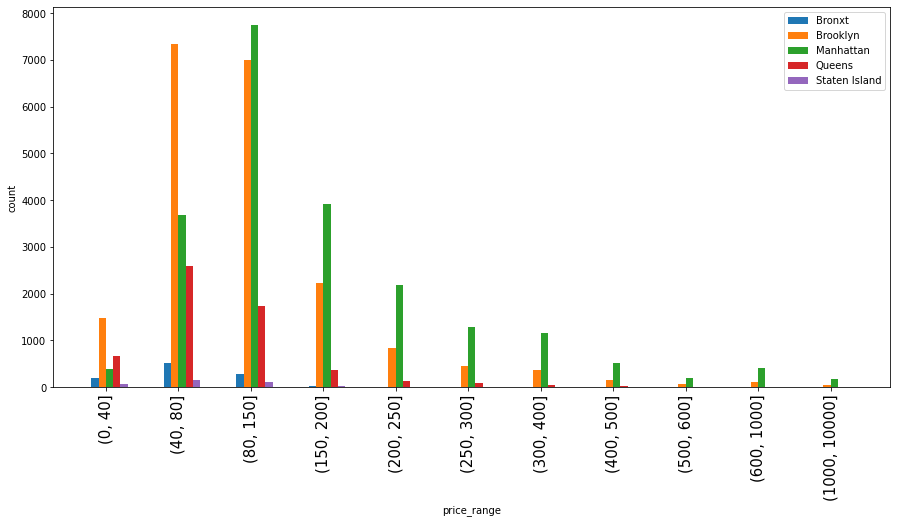

In [ ]:

plt.figure(figsize=(15,7))
w=0.10       


bar1=np.arange(11)
bar2=[w+i for i in bar1]
bar3=[w+i for i in bar2]
bar4=[w+i for i in bar3]
bar5=[w+i for i in bar4]
plt.bar(bar1,list(a['Bronx']),w,label='Bronxt')
plt.bar(bar2,list(a['Brooklyn']),w,label='Brooklyn')
plt.bar(bar3,list(a['Manhattan']),w,label='Manhattan')
plt.bar(bar4,list(a['Queens']),w,label='Queens')
plt.bar(bar5,list(a['Staten Island']),w,label='Staten Island')
              
plt.xlabel('price_range',size=10)
plt.ylabel('count',size=10)
plt.title('',size=20)
plt.xticks(bar1+3*w/2,a.index,rotation=90,fontsize=15)
plt.legend()
              
plt.show()